In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score

import statsmodels.api as sm

In [3]:
train = pd.read_csv('../../cleaned_datasets/train.csv')
test = pd.read_csv('../../cleaned_datasets/test.csv')




In [4]:
X = train.drop(columns='saleprice')
y = train['saleprice']


***
## Linear Regression With Cross Val and Log of Saleprice for Training
***

In [5]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
high_p_vals = list(model.pvalues[model.pvalues >= .05].index)[2:]
X.drop(columns = high_p_vals, inplace = True)
X.drop(columns = 'const', inplace = True)


C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


In [7]:
lr = LinearRegression()

y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)



print(cross_val_score(lr, X_train, y_train_log, cv=5).mean()
)

lr.fit(X_train, y_train_log)

print(lr.score(X_train, y_train_log), lr.score(X_test, y_test_log)
)

lr.fit(X, y.map(np.log))

0.768066203392874
0.9114166885722563 0.8874733846982875


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

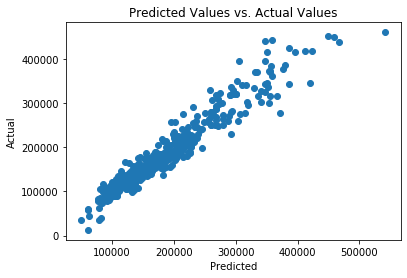

In [8]:
plt.scatter(np.exp(lr.predict(X_test)), y_test);
plt.title("Predicted Values vs. Actual Values");
plt.xlabel('Predicted');
plt.ylabel('Actual');

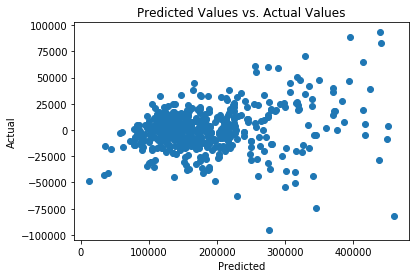

In [9]:
plt.scatter(y_test, y_test -(np.exp(lr.predict(X_test))));
plt.title("Predicted Values vs. Actual Values");
plt.xlabel('Predicted');
plt.ylabel('Actual');

In [18]:

testing = test.drop(columns = 'saleprice')

testing.drop(columns = high_p_vals, inplace = True)

display(test.head()
)

output = pd.DataFrame({'Id': test['id']})


output['SalePrice'] = lr.predict(testing)


output['SalePrice'] = output['SalePrice'].map(np.exp)

output['Id'] = [int(val) for val in output['Id']]

display(output)

pd.DataFrame.to_csv(output, '../../submissions/log_lr.csv', index = False)

,index,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,...,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,0.0,2658.0,902301120.0,190.0,69.000000,9142.0,6.0,8.0,1910.0,1950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2718.0,905108090.0,90.0,82.786765,9662.0,5.0,4.0,1977.0,1977.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2414.0,528218130.0,60.0,58.000000,17104.0,7.0,5.0,2006.0,2006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,1989.0,902207150.0,30.0,60.000000,8520.0,5.0,6.0,1923.0,2006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,625.0,535105100.0,20.0,79.027933,9500.0,6.0,5.0,1963.0,1963.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Id,SalePrice
0,2658,99428.957393
1,2718,158534.402848
2,2414,215332.352573
3,1989,103410.083658
4,625,181429.629397
...,...,...
873,1662,190072.335163
874,1234,208239.023667
875,1373,127322.413446
876,1672,111589.925800
